In [95]:
### import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [116]:
# Load dataset
df=pd.read_csv("Titanic-Dataset.csv")
df.head()


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [117]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [114]:
df.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [97]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
# Filling missing values in the 'Age' column with the mean age
df['Age'] = df['Age'].fillna(int(df['Age'].mean())) 

# Drop rows where the 'Embarked' column has missing values
df.dropna(subset=['Embarked'], inplace=True)

# Drop the 'Cabin' column entirely due to a high percentage of missing values
df = df.drop(["Cabin"], axis=1)  


In [99]:
# One-hot encode the 'Sex' and 'Embarked' categorical columns
pd.get_dummies(df, columns=["Sex", "Embarked"],drop_first=True)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  29.0      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0           A/5 21171   7.2500      True       False        True  
1            PC 17599  71.2833     False       False       False  
2    STON/O2. 3101282   7.9250     False       False        True  
3              113803  53.1000     False       False        True  
4              373450   8.0500      True       False        True  
..                ...      ...       ...         ...         ...  
886            211536  13.0000      True       False        True  
887            112053  30.0000     False       False        True  
888        W./C. 6607  23.4500     False       False        True  
889            111369  30.0000      True       False       False  
890            370376   7.7500      True        True       False  

[889 rows x 12 columns]

In [100]:
# Drop the original categorical columns 'Sex' and 'Embarked'
df_cleaned = df.drop(columns=['Sex', 'Embarked'])


In [101]:
# Initializing the OneHotEncoder
oe=OneHotEncoder(dtype=np.int32)

# Applying one-hot encoding to the 'Sex' and 'Embarked' columns
encoded = oe.fit_transform(df[["Sex", "Embarked"]]).toarray()

# new column names for the encoded features
feature_names = oe.get_feature_names_out(["Sex", "Embarked"])

# Converting the encoded NumPy array into a DataFrame
encoded_df = pd.DataFrame(encoded, columns=feature_names)


In [102]:
# concatenate cleaned original DataFrame and new one-hot encoded columns
final_df = pd.concat([df_cleaned, encoded_df], axis=1)


In [103]:
final_df.head()

PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0    1.0    0.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0    1.0    0.0   
2                             Heikkinen, Miss. Laina  26.0    0.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0    1.0    0.0   
4                           Allen, Mr. William Henry  35.0    0.0    0.0   

             Ticket     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500         0.0       1.0         0.0         0.0   
1          PC 17599  71.2833         1.0       0.0         1.0         0.0   
2  STON/O2. 3101282   7.9250         1.0       0.0         0.0         0.0   
3            113803  53.1000         1.0       0.0         0.0         0.0   
4            373450   8.0500         0.0       1.0         0.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

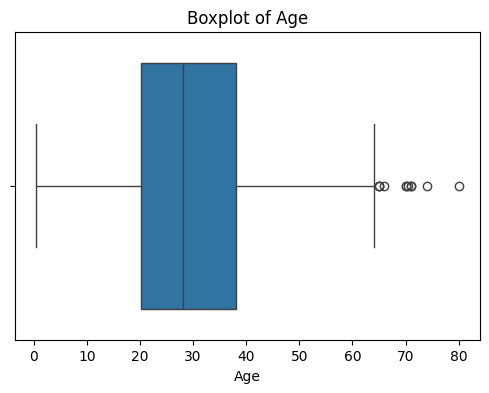

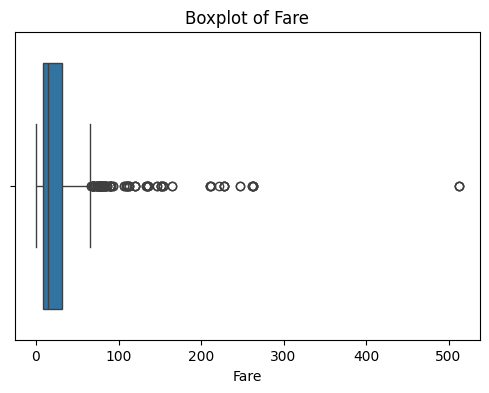

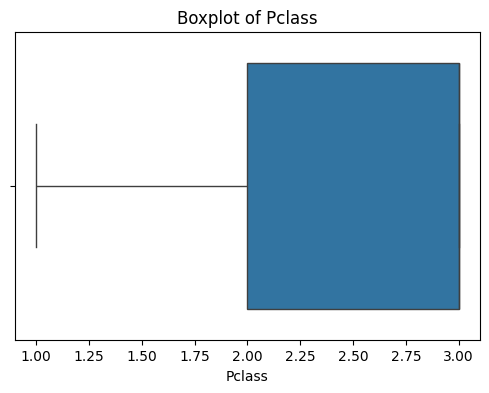

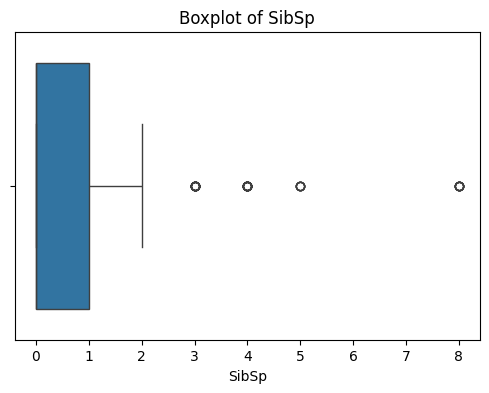

In [118]:
for col in ['Age', 'Fare', 'Pclass', 'SibSp']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [119]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside bounds with the bounds
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                     np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Columns to cap
columns_to_cap = ['Age', 'Fare', 'SibSp']

# Apply capping
for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

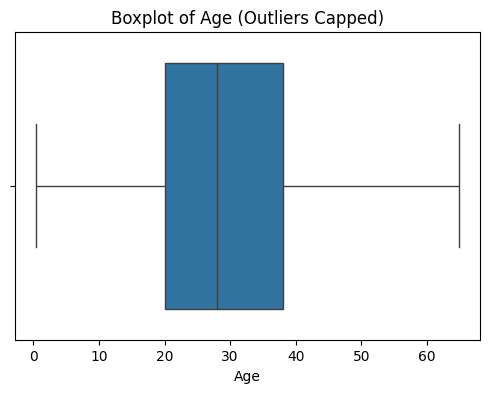

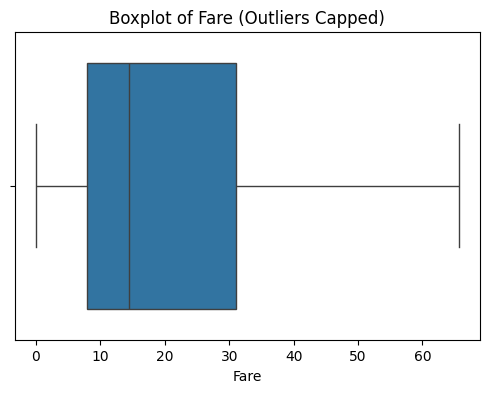

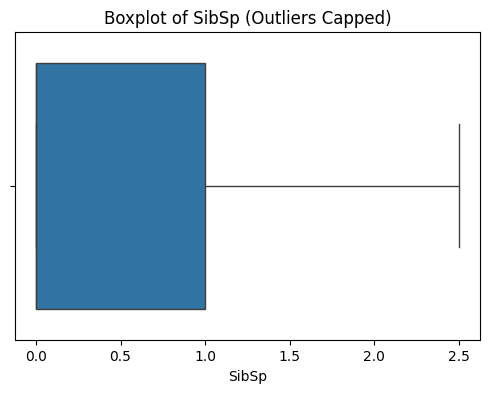

In [120]:
for col in columns_to_cap:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outliers Capped)")
    plt.show()


In [121]:

# Only standardize numerical columns (not encoded ones like 'Sex_male')
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [123]:
# Print the mean of each standardized numerical column
print("Means:\n", df[['Age', 'Fare', 'SibSp', 'Parch']].mean())

# Print the standard deviation of each standardized numerical column
print("\nStandard Deviations:\n", df[['Age', 'Fare', 'SibSp', 'Parch']].std())


Means:
 Age      1.592253e-16
Fare     9.968332e-17
SibSp    1.196200e-17
Parch    5.382900e-17
dtype: float64

Standard Deviations:
 Age      1.000701
Fare     1.000562
SibSp    1.000562
Parch    1.000562
dtype: float64
